In [1]:
import pandas
import numpy as np

In [2]:
%matplotlib inline

In [3]:
scores_filename = r"D:\owncloud\bachelor\checkpoints\nes_a3c_2\scores.txt"

In [4]:
scores_df = pandas.read_csv(scores_filename,sep="\t",header=0,index_col="steps")

In [72]:
scores_df.dtypes

elapsed    float64
mean       float64
median     float64
stdev      float64
dtype: object

In [73]:
scores_df.head(3)

,elapsed,mean,median,stdev
steps,,,,
100000,434.118173,4641.0,3810.0,1390.868633
200000,735.258807,9370.5,9552.5,2590.374758
300000,1006.100140,10633.0,10377.5,2258.070956


In [74]:
scores_df.tail(2)

,elapsed,mean,median,stdev
steps,,,,
15900000,35986.068456,11678.0,13160.0,4151.998314
16000000,36192.420799,16220.0,16325.0,4288.257222


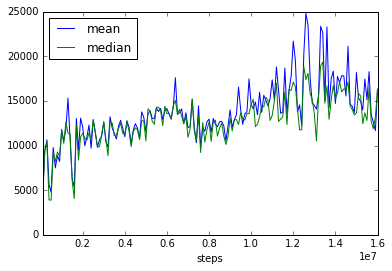

In [5]:
scores_df[["mean","median"]].plot()

In [12]:
model = pandas.ols(y=scores_df['mean'],x=scores_df.index.to_series())

D:\etc\WinPython-64bit-3.4.4.3Qt5\python-3.4.4.amd64\lib\site-packages\IPython\core\interactiveshell.py:2869: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
model


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         160
Number of Degrees of Freedom:   2

R-squared:         0.4888
Adj R-squared:     0.4856

Rmse:           2427.6022

F-stat (1, 158):   151.0903, p-value:     0.0000

Degrees of Freedom: model 1, resid 158

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.0005     0.0000      12.29     0.0000     0.0004     0.0006
     intercept  9538.3132   385.6439      24.73     0.0000  8782.4511 10294.1753
---------------------------------End of Summary---------------------------------

In [16]:
trend = model.predict(x=scores_df.index.to_series())

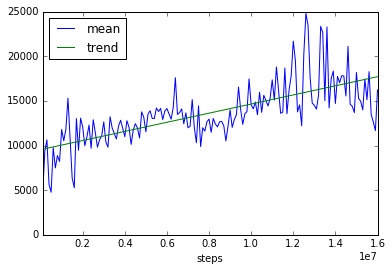

In [17]:
pandas.DataFrame(index=scores_df.index, data={'mean': scores_df['mean'], 'trend': trend}).plot()

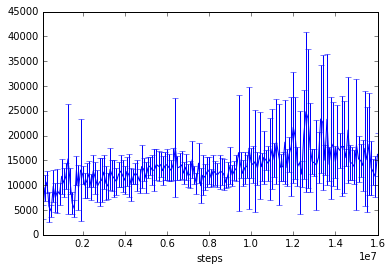

In [79]:
scores_df["mean"].plot(yerr=scores_df['stdev'])

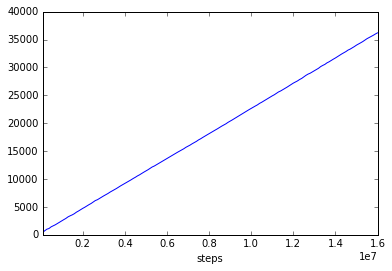

In [77]:
scores_df["elapsed"].plot()